In [1]:


import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
from datetime import datetime
import os
from thermal_lib import *
from tqdm import tqdm
import pingouin as pg
import matplotlib.patches as mpatches

def plot_avg(var, isDay, draw_sub=True, draw_sem = True, draw_zero = False, ax=None, color='b'):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6,4))

    if draw_zero:
        ax.axhline(0,color='k',linestyle='--')

    if draw_sub:
        for c in var.columns:
            ax.plot(var.index, var[c],color,alpha=.1)

    avg = var.mean(axis=1) 

    if draw_sem:
        sem = var.sem(axis=1) 
        ax.fill_between(var.index, avg+sem, avg-sem, alpha=.3, color=color,edgecolor='none')

    ax.plot(var.index, avg,color,alpha=1)
    xlims = [var.index[0], var.index[-1]]
    ax.set_xlim(xlims)
    ylims = ax.get_ylim()
    ax.fill_between(var.index, y1=ylims[0], y2=ylims[1], where=isDay<1,alpha=.2, color='gray',edgecolor='none')
    ax.set_ylim(ylims)
    #ax.set_xlabel('Time [Hours]')
    
def plot_raw(data=None, y=None, x=None, isDay=None, ax=None, hzero=True):
    
    if ax is None:
        fig,ax = plt.subplots(figsize=(8,3))

    if x is None:
        x = data.index
    
    if hzero:
        ax.axhline(0,color='k',linestyle='--')
    
    ax.plot(x, data[y] )
    ax.set_ylim([data[y].min()*1.1, data[y].max()*1.1 ])
    ylims = ax.get_ylim()
    ax.fill_between(x, where=data['isDay']==0, 
                    y1=ylims[0], 
                    y2=ylims[1], 
                    color='gray', alpha=.2, edgecolor='None' )

    ax.set_xlim([x[0], x[-1]])
    return ax

    
%matplotlib notebook

In [2]:

pth = r'D:\thermography\cdkl5_thermal_behaviour_group1\unico'
#pth = None
sub = Subjects(pth)
print(sub)

Number of Subjects: 16

0 -> ID: KO_69 RECs: 3
1 -> ID: WT_71 RECs: 3
2 -> ID: KO_70 RECs: 3
3 -> ID: WT_74 RECs: 3
4 -> ID: WT_79 RECs: 3
5 -> ID: KO_72 RECs: 3
6 -> ID: WT_81 RECs: 3
7 -> ID: KO_75 RECs: 3
8 -> ID: KO_77 RECs: 3
9 -> ID: WT_83 RECs: 3
10 -> ID: KO_1021 RECs: 3
11 -> ID: WT_86 RECs: 3
12 -> ID: WT_91 RECs: 3
13 -> ID: KO_87 RECs: 3
14 -> ID: WT_97 RECs: 3
15 -> ID: KO_99 RECs: 3



In [3]:
data_min = sub.get_data(4)
data_min.head()

minute  day  hour         RT  isDay   temp_avg   temp_med   temp_max  \
0     600    1  10.0  22.767586    1.0  26.526408  26.526408  28.450860   
1     601    1  10.0  22.778073    1.0  26.572030  26.572030  28.575758   
2     602    1  10.0  22.782499    1.0  26.597252  26.597252  28.719703   
3     603    1  10.0  22.791886    1.0  26.625250  26.625250  28.878731   
4     604    1  10.0  22.801273    1.0  26.659680  26.659680  29.054798   

   centroid_x  centroid_y  distance  temp_rt_diff  temp_norm   RT_norm  \
0   84.345575  103.522996  0.025417      3.758822  -0.538646 -0.763585   
1   83.978223  103.364895  0.014407      3.793956  -0.493024 -0.753097   
2   83.834401  103.440393  0.013272      3.814753  -0.467802 -0.748672   
3   83.666816  103.526497  0.015060      3.833363  -0.439804 -0.739284   
4   83.511369  103.556523  0.010660      3.858407  -0.405373 -0.729897   

   temp_rt_corrected  
0           0.224939  
1           0.260074  
2           0.280870  
3           0.299481  
4           0.324524

<IPython.core.display.Javascript object>


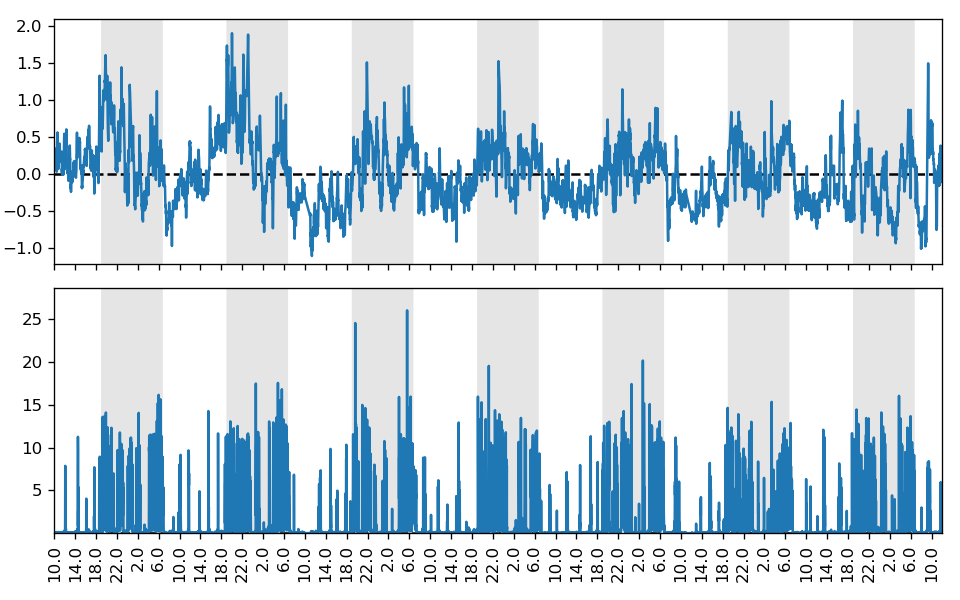

In [4]:


fig,ax = plt.subplots(2,1,figsize=(8,5),sharex=True )
plot_raw(data=data_min, y='temp_rt_corrected',ax=ax[0])
ax[0].grid(False)
ax[0].set_xticks(ticks=np.array(range(0,data_min.index[-1], 240)), labels=data_min.loc[range(0,data_min.index[-1], 240),'hour'], rotation=90 )
plot_raw(data=data_min, y='distance',ax=ax[1]) 
ax[1].set_xticks(np.array(range(0,data_min.index[-1], 240)), data_min.loc[range(0,data_min.index[-1], 240),'hour'], rotation=90  )
ax[1].grid(False)
plt.tight_layout()  





<IPython.core.display.Javascript object>


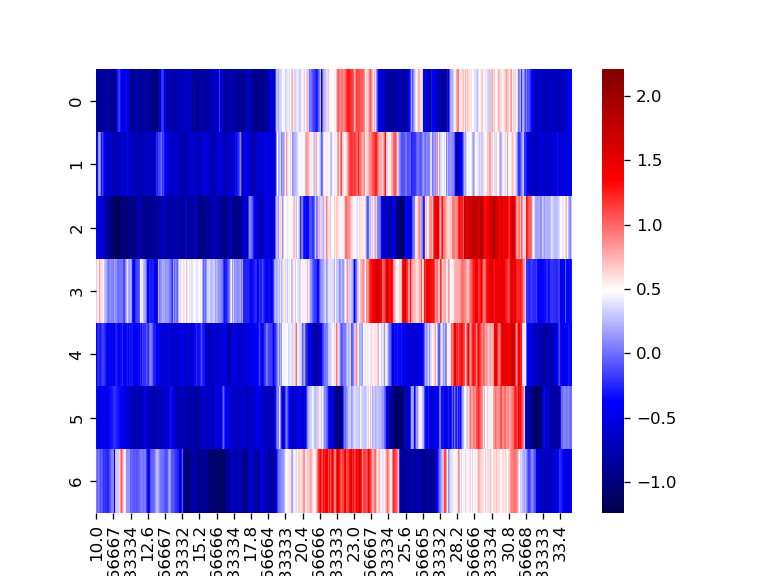

<Axes: >

In [5]:
import seaborn as sns

temperature_each_day = sub.get_days_df(10,'temp_rt_corrected')
motion_each_day = sub.get_days_df(10,'distance')
temperature_each_day.index = 10+(temperature_each_day.index/60)
motion_each_day.index = 10+(motion_each_day.index/60)
fig,ax = plt.subplots()
#ax.axhline(0,color='k',linestyle='--')
sns.heatmap( temperature_each_day.T, cmap='seismic')#, vmin=-1.5, vmax=1.5) #, color='b', alpha=.2)
#ax.plot( temperature_each_day.mean(axis=1), color='b', alpha=1 )
#plt.show()


<IPython.core.display.Javascript object>


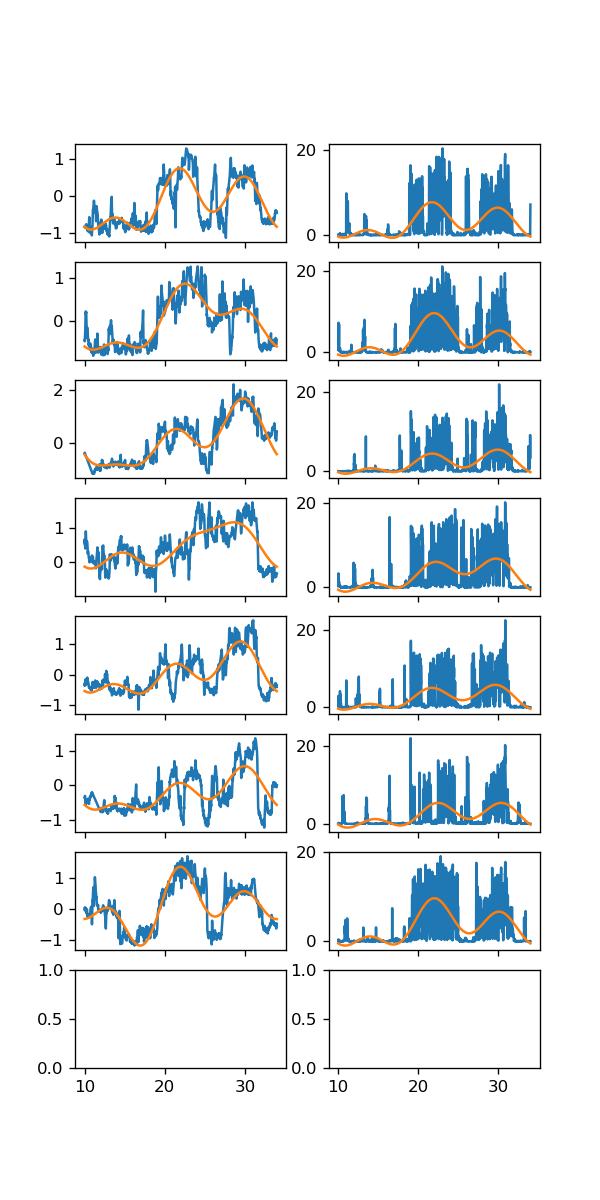

{'amplitude': [0.4523126316267736, 0.2925546434746585, 0.5375456242053623], 'period': [7.9900000000002, 11.990000000003098, 23.990000000000002], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [5.889, 8.243, 1.347]}
{'amplitude': [2.375405070517331, 1.5863720009670588, 2.4298760359547438], 'period': [8.001905484284283, 11.990000000000002, 23.990000000000002], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [5.76, 8.168, 1.094]}
{'amplitude': [0.25173677914107223, 0.16789519427341223, 0.6434174377474707], 'period': [7.990000000000033, 12.009999997818904, 23.990000000007015], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [6.147, 9.731, 0.807]}
{'amplitude': [2.505246432768451, 1.8532446528033337, 3.019976643993852], 'period': [7.990000000000001, 11.990000000000924, 23.990000000000002], 'period_r': [8.0, 12.0, 24.0], 'acrophase': [6.01, 9.067, 23.974]}
{'amplitude': [0.39611337670606317, 0.5635884545334783, 0.8784822931148885], 'period': [7.990000000000001, 12.009999999999998, 24.009999999999998], 

In [6]:
fig,ax = plt.subplots(len(temperature_each_day.columns)+1,2,sharex=True,figsize=(5,10))

for i,d in enumerate(temperature_each_day.columns):
    cc_temp_day = Cosinor(temperature_each_day[d],temperature_each_day.index)
    temp_mesor, temp_component, temp_curve, temp_time = cc_temp_day.fitComponents([8,12,24],fixed=True)
    
    cc_mot_day = Cosinor(motion_each_day[d],temperature_each_day.index)
    temp_mesor, mot_component, mot_curve, mot_time = cc_mot_day.fitComponents([8,12,24],fixed=True)
    
    ax[i,0].plot(temp_time, temperature_each_day[d])
    ax[i,0].plot(temp_time,temp_curve)
    #ax[i,0].plot(temp_component['acrophase'],temp_component['mesor']+temp_component['amplitude'] ,'rs')
    
    ax[i,1].plot(mot_time, motion_each_day[d])
    ax[i,1].plot(mot_time,mot_curve)
    #ax[i,1].plot(mot_component['acrophase'],mot_component['mesor']+mot_component['amplitude'] ,'rs')
    

<IPython.core.display.Javascript object>


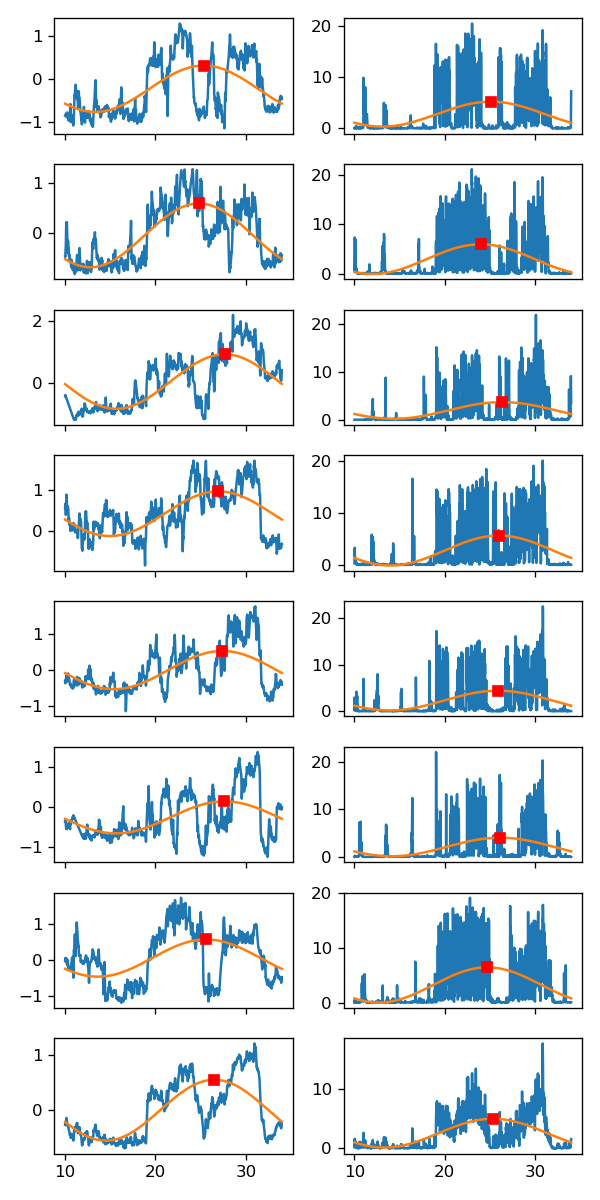

mesor  amplitude  period  acrophase        r2
0  2.571519   2.422145   24.01     25.315  0.322112

In [7]:
fig,ax = plt.subplots(len(temperature_each_day.columns)+1,2,sharex=True,figsize=(5,10))

for i,d in enumerate(temperature_each_day.columns):
    cc_temp_day = Cosinor(temperature_each_day[d],temperature_each_day.index)
    cc_temp_day.fitComponent(24,fixed=True)
    
    cc_mot_day = Cosinor(motion_each_day[d],motion_each_day.index)
    cc_mot_day.fitComponent(24,fixed=True)
    
    ax[i,0].plot(cc_temp_day.time, temperature_each_day[d])
    ax[i,0].plot(cc_temp_day.time,cc_temp_day.curve)
    ax[i,0].plot(cc_temp_day.components['acrophase'],cc_temp_day.components['mesor']+cc_temp_day.components['amplitude'] ,'rs')
    
    ax[i,1].plot(cc_mot_day.time, motion_each_day[d])
    ax[i,1].plot(cc_mot_day.time,cc_mot_day.curve)
    ax[i,1].plot(cc_mot_day.components['acrophase'],cc_mot_day.components['mesor']+cc_mot_day.components['amplitude'] ,'rs')

cc_temp_day = Cosinor(temperature_each_day.mean(axis=1),temperature_each_day.index)
ax[i+1,0].plot(cc_temp_day.time, temperature_each_day.mean(axis=1))
ax[i+1,0].plot(cc_temp_day.time,cc_temp_day.curve)
ax[i+1,0].plot(cc_temp_day.components['acrophase'],cc_temp_day.components['mesor']+cc_temp_day.components['amplitude'] ,'rs')

cc_mot_day = Cosinor(motion_each_day.mean(axis=1),motion_each_day.index)
ax[i+1,1].plot(cc_mot_day.time, motion_each_day.mean(axis=1))
ax[i+1,1].plot(cc_mot_day.time,cc_mot_day.curve)
ax[i+1,1].plot(cc_mot_day.components['acrophase'],cc_mot_day.components['mesor']+cc_mot_day.components['amplitude'] ,'rs')

plt.tight_layout()
cc_mot_day.components

## Average 24h activity

In [8]:

# motion & temperature
isDay = list()
temperature = dict()
motion = dict()
for info,rec in tqdm( sub.iter_day_avg() , total=len(sub) ):
    rec = rec.sort_values(by='minute').reset_index(drop=True)
    motion[(info['geno'], info['id'])] = rec['distance']
    temperature[(info['geno'], info['id'])] = rec['temp_rt_corrected']
    isDay.append(rec['isDay'])
    
isDay = pd.concat(isDay,axis=1).mean(axis=1)
motion = pd.DataFrame.from_dict(motion)
temperature = pd.DataFrame.from_dict(temperature,)
#time_range = pd.timedelta_range(start='0 days 10:00:00', end='1 days 09:59:00', freq='1min')





100%|██████████| 16/16 [00:00<00:00, 49.58it/s]


<IPython.core.display.Javascript object>


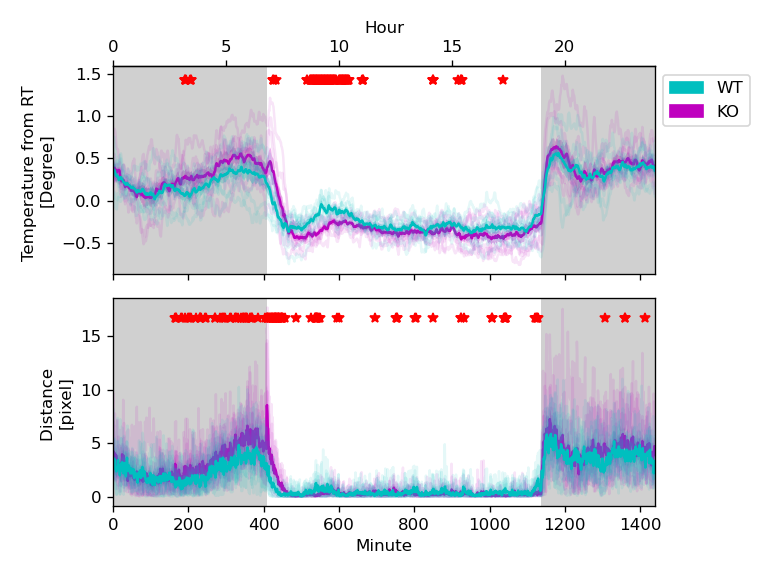

In [9]:
fig,ax = plt.subplots(2,1,sharex=True) 

wt_patch = mpatches.Patch(color='c', label='WT')
ko_patch = mpatches.Patch(color='m', label='KO')
ax[0].legend(handles=[wt_patch, ko_patch],bbox_to_anchor=(1, 1),)

plot_avg( temperature.xs('KO',level=0,axis=1), isDay,color='m',ax=ax[0])
plot_avg( temperature.xs('WT',level=0,axis=1), isDay,color='c',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')
ax2 = ax[0].secondary_xaxis("top", functions=(lambda x: x/60, lambda x: x*60))
ax2.set_xlabel('Hour')

plot_avg( motion.xs('KO',level=0,axis=1), isDay,color='m', ax=ax[1])
plot_avg( motion.xs('WT',level=0,axis=1), isDay,color='c', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')
ax[1].set_xlabel('Minute')

temperature_ttests = list()
for i,row in temperature.iterrows():
    temp = pg.ttest(row['WT'].values,row['KO'].values)
    temp['minute'] = i
    temperature_ttests.append( temp )
temperature_ttests = pd.concat(temperature_ttests).sort_values(by='p-val')    
reject, pvals_corr = pg.multicomp(temperature_ttests['p-val'], method='fdr_bh')
temperature_ttests['p-corr'] = pvals_corr

pval_signi = temperature_ttests[temperature_ttests['p-val']<0.05] #temperature_ttests[temperature_ttests['p-corr']<0.05]
signi_pos = np.max(ax[0].get_ylim())*.9
ax[0].plot( pval_signi.minute, np.repeat(signi_pos,len(pval_signi)),'*r' )

motion_ttests = list()
for i,row in motion.iterrows():
    temp = pg.ttest(row['WT'].values,row['KO'].values)
    temp['minute'] = i
    motion_ttests.append( temp )
motion_ttests = pd.concat(motion_ttests).sort_values(by='p-val')    
reject, pvals_corr = pg.multicomp(motion_ttests['p-val'], method='fdr_bh')
motion_ttests['p-corr'] = pvals_corr

pval_signi = motion_ttests[motion_ttests['p-val']<0.05] #motion_ttests[motion_ttests['p-corr']<0.05]
signi_pos = np.max(ax[1].get_ylim())*.9
ax[1].plot( pval_signi.minute, np.repeat(signi_pos,len(pval_signi)),'*r' )



plt.tight_layout()

In [10]:
isDay = list()
temperature = dict()
motion = dict()
for info,rec in tqdm( sub.iter_data() , total=len(sub) ):
    #rec = rec.sort_values(by='minute').reset_index(drop=True)
    motion[(info['geno'], info['id'])] = rec['distance']
    temperature[(info['geno'], info['id'])] = rec['temp_rt_diff']
    isDay.append(rec['isDay'])

isDay = pd.concat(isDay,axis=1).mean(axis=1)
motion = pd.DataFrame.from_dict(motion)
temperature = pd.DataFrame.from_dict(temperature,)

100%|██████████| 16/16 [00:00<00:00, 38.28it/s]


<IPython.core.display.Javascript object>


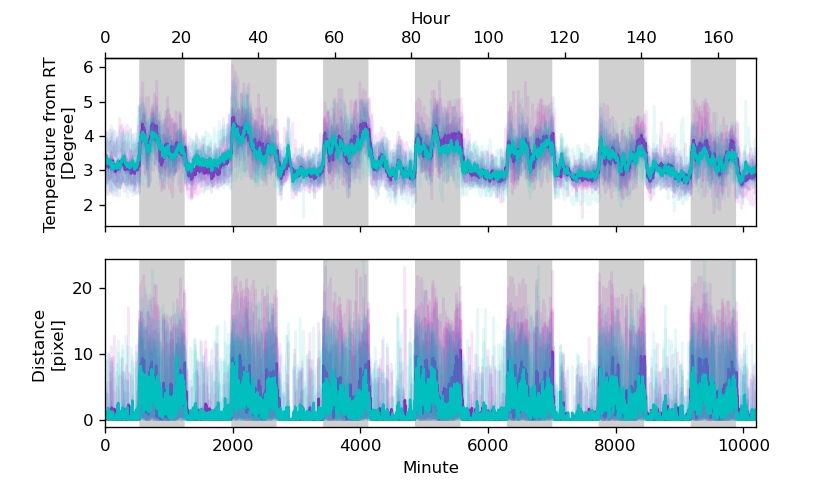

Text(0.5, 0, 'Minute')

In [11]:
fig,ax = plt.subplots(2,1,sharex=True, figsize=(7,4)) 
plot_avg( temperature.xs('KO',level=0,axis=1), isDay,color='m',ax=ax[0])
plot_avg( temperature.xs('WT',level=0,axis=1), isDay,color='c',ax=ax[0])
ax[0].set_ylabel('Temperature from RT \n[Degree]')
ax2 = ax[0].secondary_xaxis("top", functions=(lambda x: x/60, lambda x: x*60))
ax2.set_xlabel('Hour')

plot_avg( motion.xs('KO',level=0,axis=1), isDay,color='m', ax=ax[1])
plot_avg( motion.xs('WT',level=0,axis=1), isDay,color='c', ax=ax[1])
ax[1].set_ylabel('Distance \n[pixel]')
ax[1].set_xlabel('Minute')

In [12]:
temperature

KO        WT        KO        WT                  KO        WT  \
          KO_69     WT_71     KO_70     WT_74     WT_79     KO_72     WT_81   
0      3.075742  3.557021  2.986998  3.268596  3.758822  3.661139  4.072969   
1      3.039879  3.689415  3.014151  3.276870  3.793956  3.728878  4.004045   
2      3.127935  3.827841  3.004214  3.314955  3.814753  3.802757  4.012131   
3      3.211013  3.864218  2.817987  3.383058  3.833363  3.800190  3.928489   
4      3.294091  3.772166  2.631760  3.430088  3.858407  3.786201  3.956127   
...         ...       ...       ...       ...       ...       ...       ...   
10196  2.980884  3.411924  2.676542  2.780097  3.539345  3.270073  3.053631   
10197  3.029604  3.452238  2.815471  2.809986  3.471215  3.292426  2.992013   
10198  3.019076  3.478527  2.940515  2.782133  3.474131  3.286702  3.010515   
10199  3.003938  3.500240  2.985660  2.695297  3.481091  3.192127  3.021733   
10200  3.001869  3.532022  2.983554  2.691408  3.422658  3.173845  3.019958   

             KO                  WT        KO        WT                  KO  \
          KO_75     KO_77     WT_83   KO_1021     WT_86     WT_91     KO_87   
0      3.237762  3.073002  3.371212  2.519167  3.288229  3.696209  3.038108   
1      3.229569  3.058205  3.232738  2.532867  3.261126  3.704289  3.059189   
2      3.236000  3.048893  3.092706  2.541889  3.137709  3.738027  3.058339   
3      3.346398  3.015752  3.031983  2.537949  3.001368  3.665661  3.065454   
4      3.456795  2.983967  2.996447  2.535262  2.866216  3.702073  3.049088   
...         ...       ...       ...       ...       ...       ...       ...   
10196  2.870473  2.957373  2.730610  3.136414  2.861339  2.806622  2.808385   
10197  2.911444  2.954887  2.699165  3.063143  2.856072  2.836206  2.776305   
10198  2.906919  2.969727  2.713533  3.130077  2.935922  2.845959  2.785657   
10199  2.880697  2.985875  2.648973  3.119217  2.987362  2.855709  2.797100   
10200  2.866155  3.002076  2.653379  3.100265  2.973119  2.799040  2.805172   

             WT        KO  
          WT_97     KO_99  
0      2.821120  3.914094  
1      2.841546  3.816394  
2      2.927371  3.820027  
3      2.986429  3.809996  
4      3.015008  3.792922  
...         ...       ...  
10196  2.664195  2.679291  
10197  2.560771  2.592818  
10198  2.577494  2.527075  
10199  2.594217  2.461331  
10200  2.598561  2.546539  

[10201 rows x 16 columns]

## Cross Correlation

In [13]:
cc_data = list()
cross_corr_curves = list()
for i,(geno,chi) in enumerate(temperature.columns):
    cc = CrossCorrelation(temperature[geno][chi], motion[geno][chi],60)
    summary = cc.summary
    summary.insert(0, 'sub', chi)
    summary.insert(1, 'geno', geno)
    cc_data.append(summary)
    
    cc_temp = pd.DataFrame(cc.cross_correlation).T
    cc_temp.insert(0, 'sub', chi)
    cc_temp.insert(1,'geno', geno)
    cross_corr_curves.append(cc_temp)

#fig,ax = plt.subplots()
#cc.plot() #ax=ax)
#plt.tight_layout()
cc_data = pd.concat(cc_data)
cross_corr_curves = pd.concat(cross_corr_curves)



<IPython.core.display.Javascript object>


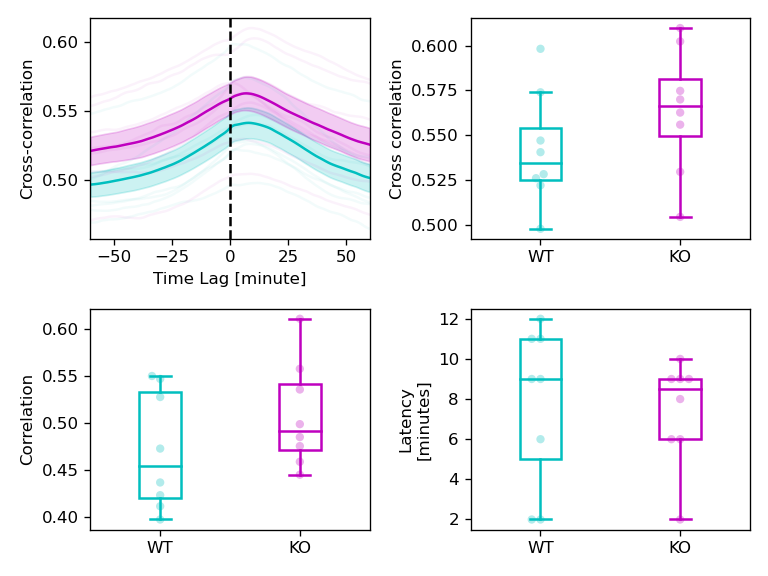

C:\Users\pupil\AppData\Local\Temp\ipykernel_8692\3558646645.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=cc_data,x='geno',y='amplitude',palette={'WT':'c','KO':'m'},ax=ax[0,1],alpha=.3,order=['WT','KO'])
C:\Users\pupil\AppData\Local\Temp\ipykernel_8692\3558646645.py:50: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=cc_data,x='geno',y='corr_coeff',palette={'WT':'c','KO':'m'},ax=ax[1,0],alpha=.3,order=['WT','KO'])
C:\Users\pupil\AppData\Local\Temp\ipykernel_8692\3558646645.py:75: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=cc_data,x='geno',y='latency_minute',palette={'WT':'c','KO':'m'},ax=ax[1,1],alpha=.3,order=['WT','KO'])


T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  1.317680   14   two-sided  0.208767  [-0.01, 0.06]  0.658840  0.755   
T-test  1.265682   14   two-sided  0.226285   [-0.03, 0.1]  0.632841  0.724   
T-test -0.222288   14   two-sided  0.827300  [-3.99, 3.24]  0.111144  0.435   

           power        what  
T-test  0.232926   amplitude  
T-test  0.218549  corr_coeff  
T-test  0.054946     latency

In [14]:
import matplotlib
fig,ax = plt.subplots(2,2)
wt_cross_corr_curves = cross_corr_curves[cross_corr_curves['geno']=='WT']
ko_cross_corr_curves = cross_corr_curves[cross_corr_curves['geno']=='KO']
ax[0,0].plot(cc.latencies, wt_cross_corr_curves.iloc[:,2:].T,'c',alpha=.05 )
ax[0,0].plot(cc.latencies, ko_cross_corr_curves.iloc[:,2:].T,'m',alpha=.05 )

wt_mean = wt_cross_corr_curves.iloc[:,2:].T.mean(axis=1)
wt_sem = wt_cross_corr_curves.iloc[:,2:].T.sem(axis=1)
ax[0,0].plot(cc.latencies, wt_mean,'c',alpha=1 )
ax[0,0].fill_between(cc.latencies, y1=wt_mean-wt_sem, y2=wt_mean+wt_sem,color ='c', alpha=.2)

ko_mean = ko_cross_corr_curves.iloc[:,2:].T.mean(axis=1)
ko_sem = ko_cross_corr_curves.iloc[:,2:].T.sem(axis=1)
ax[0,0].plot(cc.latencies, ko_cross_corr_curves.iloc[:,2:].T.mean(axis=1),'m',alpha=1 )
ax[0,0].fill_between(cc.latencies, y1=ko_mean-ko_sem, y2=ko_mean+ko_sem,color ='m', alpha=.2 )

ax[0,0].axvline(0,color='k',linestyle='--')

ax[0,0].set_ylabel('Cross-correlation')
ax[0,0].set_xlabel('Time Lag [minute]')
ax[0,0].set_xlim([-60,60])

PROPS = {'boxprops':{'facecolor':'none'}}
sns.swarmplot(data=cc_data,x='geno',y='amplitude',palette={'WT':'c','KO':'m'},ax=ax[0,1],alpha=.3,order=['WT','KO'])
sns.boxplot(data=cc_data,x='geno',y='amplitude',palette={'WT':'c','KO':'m'},ax=ax[0,1],order=['WT','KO'],width=0.3,fliersize=0, **PROPS)
ax[0,1].set_ylabel('Cross correlation')
ax[0,1].set_xlabel('')

box_patches = [patch for patch in ax[0,1].patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax[1,0].artists
    box_patches = ax[0,1].artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax[0,1].lines) // num_patches
for i, patch in enumerate(box_patches):
    if i==0:
        col='c'
    else:
        col='m'
    patch.set_edgecolor(col)
    #patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax[0,1].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        #line.set_mfc(col)  # facecolor of fliers
        #line.set_mec(col)  # edgecolor of fliers

sns.swarmplot(data=cc_data,x='geno',y='corr_coeff',palette={'WT':'c','KO':'m'},ax=ax[1,0],alpha=.3,order=['WT','KO'])
sns.boxplot(data=cc_data,x='geno',y='corr_coeff',palette={'WT':'c','KO':'m'},ax=ax[1,0],order=['WT','KO'],width=0.3,fliersize=0, **PROPS)
ax[1,0].set_ylabel('Correlation')
ax[1,0].set_xlabel('')

box_patches = [patch for patch in ax[1,0].patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax[1,0].artists
    box_patches = ax[1,0].artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax[1,0].lines) // num_patches
for i, patch in enumerate(box_patches):
    if i==0:
        col='c'
    else:
        col='m'
    patch.set_edgecolor(col)
    #patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax[1,0].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        #line.set_mfc(col)  # facecolor of fliers
        #line.set_mec(col)  # edgecolor of fliers
        
sns.swarmplot(data=cc_data,x='geno',y='latency_minute',palette={'WT':'c','KO':'m'},ax=ax[1,1],alpha=.3,order=['WT','KO'])
sns.boxplot(data=cc_data,x='geno',y='latency_minute',palette={'WT':'c','KO':'m'},ax=ax[1,1],order=['WT','KO'],width=0.3,fliersize=0, **PROPS)
ax[1,1].set_ylabel('Latency\n[minutes]')
ax[1,1].set_xlabel('')

box_patches = [patch for patch in ax[1,1].patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax[1,1].artists
    box_patches = ax[1,1].artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax[1,1].lines) // num_patches
for i, patch in enumerate(box_patches):
    if i==0:
        col='c'
    else:
        col='m'
    patch.set_edgecolor(col)
    #patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax[1,1].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        #line.set_mfc(col)  # facecolor of fliers
        #line.set_mec(col)  # edgecolor of fliers

plt.tight_layout()

ko_cc_amp = cc_data[cc_data['geno']=='KO']['amplitude']
wt_cc_amp = cc_data[cc_data['geno']=='WT']['amplitude']
stats_cc_amp = pg.ttest(ko_cc_amp, wt_cc_amp)
stats_cc_amp['what'] = 'amplitude'

ko_cc_corr_coeff = cc_data[cc_data['geno']=='KO']['corr_coeff']
wt_cc_corr_coeff = cc_data[cc_data['geno']=='WT']['corr_coeff']
stats_cc_corr_coeff = pg.ttest(ko_cc_corr_coeff, wt_cc_corr_coeff)
stats_cc_corr_coeff['what'] = 'corr_coeff'

ko_cc_lat = cc_data[cc_data['geno']=='KO']['latency_minute']
wt_cc_lat = cc_data[cc_data['geno']=='WT']['latency_minute']
stats_cc_lat = pg.ttest(ko_cc_lat, wt_cc_lat)
stats_cc_lat['what'] = 'latency'

pd.concat([stats_cc_amp, stats_cc_corr_coeff,stats_cc_lat] )

In [15]:
data_min = sub.get_data(2)
data_min

minute  day  hour         RT  isDay   temp_avg   temp_med   temp_max  \
0         600    1  10.0  22.767605    1.0  25.754603  25.754603  28.325226   
1         601    1  10.0  22.778019    1.0  25.792170  25.792170  28.388989   
2         602    1  10.0  22.782509    1.0  25.786722  25.786722  28.308771   
3         603    1  10.0  22.791894    1.0  25.609881  25.499695  27.432357   
4         604    1  10.0  22.801280    1.0  25.433040  25.433040  27.354539   
...       ...  ...   ...        ...    ...        ...        ...        ...   
10196     716    8  11.0  24.219292    1.0  26.895834  27.023292  28.869508   
10197     717    8  11.0  24.215859    1.0  27.031330  27.182202  29.060064   
10198     718    8  11.0  24.226312    1.0  27.166826  27.166826  28.956093   
10199     719    8  11.0  24.241394    1.0  27.227054  27.227054  29.041018   
10200     720    8  12.0  24.243500    1.0  27.227054  27.348009  29.126909   

       centroid_x  centroid_y  distance  temp_rt_diff  temp_norm   RT_norm  \
0       76.818150  116.558583  0.038290      2.986998  -0.965746 -0.763582   
1       76.953482  116.360005  0.021584      3.014151  -0.928180 -0.753167   
2       77.137998  116.404574  0.176372      3.004214  -0.933627 -0.748678   
3       77.020442  117.218130  0.062345      2.817987  -1.110469 -0.739293   
4       76.938515  117.449705  0.023656      2.631760  -1.287310 -0.729907   
...           ...         ...       ...           ...        ...       ...   
10196   74.465724   65.350101  0.140264      2.676542   0.175484  0.688105   
10197   74.169611   64.586106  0.205253      2.815471   0.310980  0.684672   
10198   73.791032   65.477967  0.220458      2.940515   0.446477  0.695125   
10199   73.758932   65.376029  0.174998      2.985660   0.506704  0.710208   
10200   71.870208   64.427117  0.000000      2.983554   0.506704  0.712314   

       temp_rt_corrected  
0              -0.202165  
1              -0.175012  
2              -0.184949  
3              -0.371176  
4              -0.557403  
...                  ...  
10196          -0.512621  
10197          -0.373692  
10198          -0.248648  
10199          -0.203503  
10200          -0.205609  

[10201 rows x 15 columns]

In [16]:

cos = Cosinor(data_min['temp_rt_diff'], 10+(data_min.index/60),fs=60)
cos.components

mesor  amplitude  period  acrophase        r2
0  3.193056   0.372742   24.01     48.498  0.369869

<IPython.core.display.Javascript object>


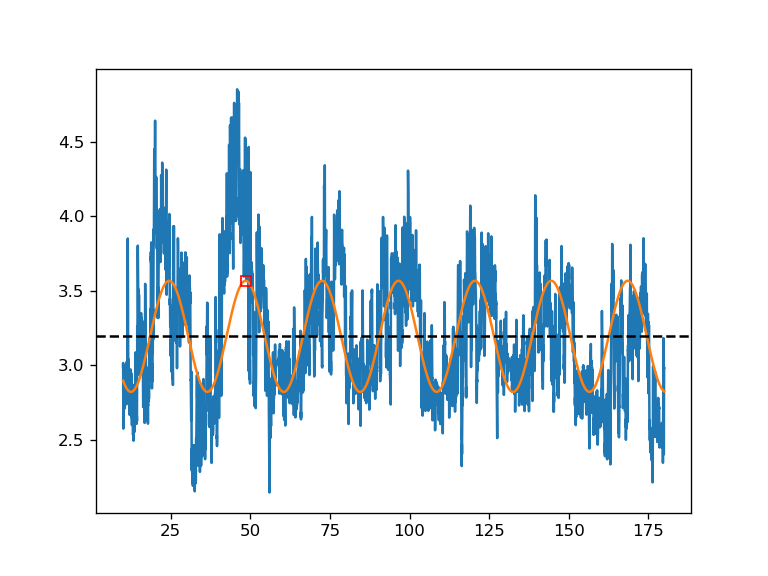

In [155]:

fig,ax = plt.subplots()
ax.plot(10+(data_min.index/60), data_min['temp_rt_diff'])
ax.plot(cos.time, cos.curve)
ax.axhline(cos.components['mesor'].values[0],color='k',linestyle='--')
ax.plot(cos.components['acrophase'].values[0], cos.components['mesor'].values[0] + cos.components['amplitude'].values[0], 'sr', markerfacecolor='None')



## Periodogram

In [3]:
isDay = list()
temperature = dict()
motion = dict()
for info,rec in tqdm( sub.iter_data() , total=len(sub) ):
    #rec = rec.sort_values(by='minute').reset_index(drop=True)
    motion[(info['geno'], info['id'])] = rec['distance']
    temperature[(info['geno'], info['id'])] = rec['temp_rt_diff']
    isDay.append(rec['isDay'])

isDay = pd.concat(isDay,axis=1).mean(axis=1)
motion = pd.DataFrame.from_dict(motion)
temperature = pd.DataFrame.from_dict(temperature,)

100%|██████████| 16/16 [00:00<00:00, 35.16it/s]


In [4]:
temp_periodogram_data = list()
periodogram_amps = {'sub':list(), 'geno':list(), '24':list(), '12':list(), '8':list()}

for i,(geno,chi) in enumerate(temperature.columns):
    temp = Periodogram(temperature[geno][chi],fs=60)
    ps = pd.DataFrame(temp.power_spectrum,index=temp.period).T #temp.interp_func(range(1,49)),index=range(1,49)).T 
    ps.insert(0, 'sub', chi)
    ps.insert(1, 'geno', geno)
    temp_periodogram_data.append(ps)
    
    periodogram_amps['sub'].append(chi)
    periodogram_amps['geno'].append(geno)
    periodogram_amps['24'].append(float( temp.interp_func(24) ))
    periodogram_amps['12'].append(float( temp.interp_func(12) ))
    periodogram_amps['8'].append(float( temp.interp_func(8) ))
    
temp_periodogram_data = pd.concat(temp_periodogram_data)
periodogram_amps = pd.DataFrame(periodogram_amps).infer_objects()

In [5]:
import matplotlib
import seaborn as sns
def swarmbox(data,x,y,ax=None,palette=None,order=None):
    PROPS = {'boxprops':{'facecolor':'none'}}
    sns.swarmplot(data=data,x=x,y=y,palette=palette,ax=ax,alpha=.3,order=order)
    sns.boxplot(data=data,x=x,y=y,palette=palette,ax=ax,order=order,width=0.3,fliersize=0, **PROPS)

    box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
    if len(box_patches) == 0:  
        box_patches = ax.artists
    num_patches = len(box_patches)
    lines_per_boxplot = len(ax.lines) // num_patches
    if type(palette)==dict:
        palette=[i[1] for i in list(palette.items()) ]
    for i, patch in enumerate(box_patches):
        if i==0:
            col=palette[0]
        else:
            col=palette[1]
        patch.set_edgecolor(col)
        for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
            line.set_color(col)


<IPython.core.display.Javascript object>


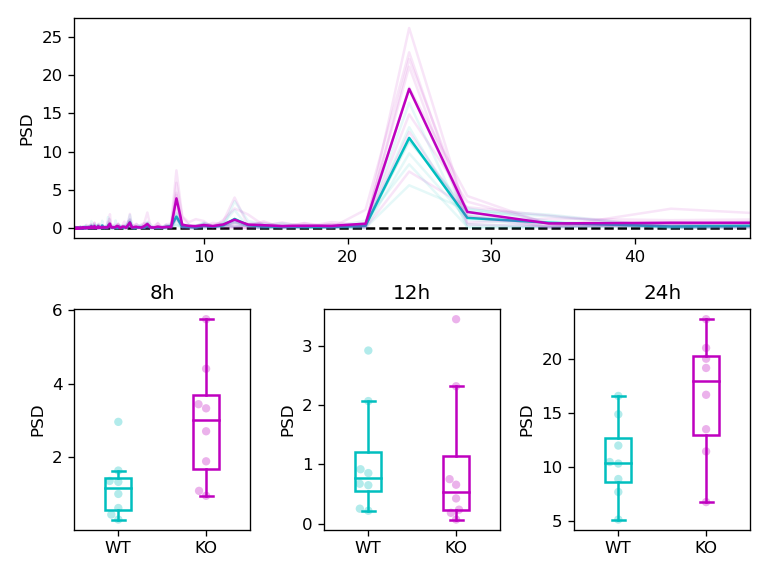

C:\Users\pupil\AppData\Local\Temp\ipykernel_18760\4129271960.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data,x=x,y=y,palette=palette,ax=ax,alpha=.3,order=order)
C:\Users\pupil\AppData\Local\Temp\ipykernel_18760\4129271960.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data,x=x,y=y,palette=palette,ax=ax,alpha=.3,order=order)
C:\Users\pupil\AppData\Local\Temp\ipykernel_18760\4129271960.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data,x=x,y=y,palette=palette,ax=ax,alpha=.3,order=order)


T  dof alternative     p-val            CI95%   cohen-d   BF10  \
T-test -2.429421   14   two-sided  0.029175  [-10.94, -0.68]  1.214710  2.492   
T-test  0.106624   14   two-sided  0.916600    [-1.11, 1.22]  0.053312  0.429   
T-test -2.650390   14   two-sided  0.019015   [-3.15, -0.33]  1.325195  3.327   

           power  what  
T-test  0.618258    24  
T-test  0.051135    12  
T-test  0.693453     8

In [6]:
wt_temp_periodogram_data = temp_periodogram_data[temp_periodogram_data['geno']=='WT'].iloc[:,2:].T
ko_temp_periodogram_data = temp_periodogram_data[temp_periodogram_data['geno']=='KO'].iloc[:,2:].T

#fig,ax=plt.subplots()
fig, ax = plt.subplot_mosaic(
    [["full_spectrum", "full_spectrum", "full_spectrum"],
     ["8", "12", "24"]]
)

ax["full_spectrum"].axhline(0,color='k', linestyle='--')
ax["full_spectrum"].plot(wt_temp_periodogram_data.index, wt_temp_periodogram_data,'c',alpha=0.1)
ax["full_spectrum"].plot(wt_temp_periodogram_data.index, wt_temp_periodogram_data.mean(axis=1),'c',alpha=1)

ax["full_spectrum"].plot(ko_temp_periodogram_data.index, ko_temp_periodogram_data,'m',alpha=0.1)
ax["full_spectrum"].plot(ko_temp_periodogram_data.index, ko_temp_periodogram_data.mean(axis=1),'m',alpha=1)

ax["full_spectrum"].set_xlim([1,48])
ax['full_spectrum'].set_ylabel('PSD')

swarmbox(data=periodogram_amps,x='geno',y='24',ax=ax['24'],palette={'WT':'c','KO':'m'},order=['WT','KO'])
wt_periodogram_amps = periodogram_amps[periodogram_amps['geno']=='WT']['24']
ko_periodogram_amps = periodogram_amps[periodogram_amps['geno']=='KO']['24']
periodogram_amps_stats_24 = pg.ttest(wt_periodogram_amps,ko_periodogram_amps)
periodogram_amps_stats_24['what'] = 24
ax['24'].set_ylabel('PSD')
ax['24'].set_xlabel('')
ax['24'].set_title('24h')

swarmbox(data=periodogram_amps,x='geno',y='12',ax=ax['12'],palette={'WT':'c','KO':'m'},order=['WT','KO'])
wt_periodogram_amps = periodogram_amps[periodogram_amps['geno']=='WT']['12']
ko_periodogram_amps = periodogram_amps[periodogram_amps['geno']=='KO']['12']
periodogram_amps_stats_12 = pg.ttest(wt_periodogram_amps,ko_periodogram_amps)
periodogram_amps_stats_12['what'] = 12
ax['12'].set_ylabel('PSD')
ax['12'].set_xlabel('')
ax['12'].set_title('12h')

swarmbox(data=periodogram_amps,x='geno',y='8',ax=ax['8'],palette={'WT':'c','KO':'m'},order=['WT','KO'])
wt_periodogram_amps = periodogram_amps[periodogram_amps['geno']=='WT']['8']
ko_periodogram_amps = periodogram_amps[periodogram_amps['geno']=='KO']['8']
periodogram_amps_stats_8 = pg.ttest(wt_periodogram_amps,ko_periodogram_amps)
periodogram_amps_stats_8['what'] = 8
ax['8'].set_ylabel('PSD')
ax['8'].set_xlabel('')
ax['8'].set_title('8h')

plt.tight_layout()
pd.concat([periodogram_amps_stats_24,periodogram_amps_stats_12,periodogram_amps_stats_8])

T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -1.964412   14   two-sided  0.069651  [-0.7, 0.03]  0.982206  1.424   

           power  
T-test  0.448154

C:\Users\pupil\AppData\Local\Temp\ipykernel_16680\2723558425.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data,x=x,y=y,palette=palette,ax=ax,alpha=.3,order=order)
